In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

1. Классификатор на основе наивного байесовского алгоритма.

In [77]:
data_x = [(7.2, 2.5), (6.4, 2.2), (6.3, 1.5), (7.7, 2.2), (6.2, 1.8), (5.7, 1.3), (7.1, 2.1), (5.8, 2.4), (5.2, 1.4), (5.9, 1.5), (7.0, 1.4), (6.8, 2.1), (7.2, 1.6), (6.7, 2.4), (6.0, 1.5), (5.1, 1.1), (6.6, 1.3), (6.1, 1.4), (6.7, 2.1), (6.4, 1.8), (5.6, 1.3), (6.9, 2.3), (6.4, 1.9), (6.9, 2.3), (6.5, 2.2), (6.0, 1.5), (5.6, 1.1), (5.6, 1.5), (6.0, 1.0), (6.0, 1.8), (6.7, 2.5), (7.7, 2.3), (5.5, 1.1), (5.8, 1.0), (6.9, 2.1), (6.6, 1.4), (6.3, 1.6), (6.1, 1.4), (5.0, 1.0), (7.7, 2.0), (4.9, 1.7), (7.2, 1.8), (6.8, 1.4), (6.1, 1.2), (5.8, 1.9), (6.3, 2.5), (5.7, 2.0), (6.5, 1.8), (7.6, 2.1), (6.3, 1.5), (6.7, 1.4), (6.4, 2.3), (6.2, 2.3), (6.3, 1.9), (5.5, 1.3), (7.9, 2.0), (6.7, 1.8), (6.4, 1.3), (6.5, 2.0), (6.5, 1.5), (6.9, 1.5), (5.6, 1.3), (5.8, 1.2), (6.7, 2.3), (6.0, 1.6), (5.7, 1.2), (5.7, 1.0), (5.5, 1.0), (6.1, 1.4), (6.3, 1.8), (5.7, 1.3), (6.1, 1.3), (5.5, 1.3), (6.3, 1.3), (5.9, 1.8), (7.7, 2.3), (6.5, 2.0), (5.6, 2.0), (6.7, 1.7), (5.7, 1.3), (5.5, 1.2), (5.0, 1.0), (5.8, 1.9), (6.2, 1.3), (6.2, 1.5), (6.3, 2.4), (6.4, 1.5), (7.4, 1.9), (6.8, 2.3), (5.6, 1.3), (5.8, 1.2), (7.3, 1.8), (6.7, 1.5), (6.3, 1.8), (6.0, 1.6), (6.4, 2.1), (6.1, 1.8), (5.9, 1.8), (5.4, 1.5), (4.9, 1.0)]
data_y = [1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1]

x_train = np.array(data_x)
y_train = np.array(data_y)

# математические ожидания
mx11, mx12 = np.mean(x_train[y_train == -1], axis=0)
mx21, mx22 = np.mean(x_train[y_train == 1], axis=0)

# дисперсии
Dx11, Dx12 = np.var(x_train[y_train == -1], axis=0)
Dx21, Dx22 = np.var(x_train[y_train == 1], axis=0)

lm1 = 1     # штраф неверной классификации 1-го класса (-1)
lm2 = 1     # штраф неверной классификации 2-го класса (+1)
P1 = 0.5    # априорная вероятность появления образов 1-го класса
P2 = 1 - P1 # априорная вероятность появления образов 2-го класса

a_1 = np.array([-np.log(lm1*Dx11*Dx12) - (l - mx11)**2 / (2*(Dx11)) - (w - mx12)**2 / (2*(Dx12)) for l, w in x_train])

a1 = np.array([-np.log(lm2*Dx21*Dx22) - (l - mx21)**2 / (2*(Dx21)) - (w - mx22)**2 / (2*(Dx22)) for l, w in x_train])

predict = np.array([np.argmax([x, y])*2 - 1 for x, y in zip(a_1, a1)])
Q = np.sum([predict != y_train])/len(x_train)

Находим признаки векторов х1 и х2 по закону нормального распределения:
### $p(x_{i} \vert y = -1 \vert +1) = \frac{1}{2 \pi * \sqrt{D_{1}D_{2}}} * exp \lgroup - \frac{(x_{1} - mx_{1})^2}{2D_{1}} - \frac{(x_{2} - mx_{2})^2}{2D_{2}} \rgroup$

Алгоритм классификации объектов обучающей выборки:
### $a(x) = argmax \lgroup ln(\lambda * P(y)) + \sum ln(p(x_{i} \vert y)) \rgroup$

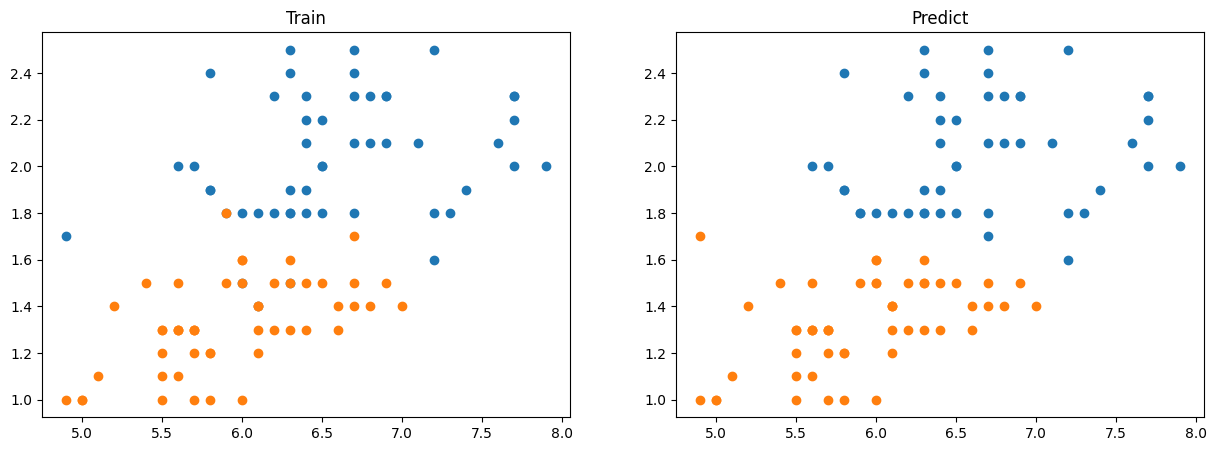

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

xmin, xmax = np.min(x_train[:,0]), np.max(x_train[:,0])
ymin, ymax = np.min(x_train[:,1]), np.max(x_train[:,1])

axs[0].set_title("Train")
axs[1].set_title("Predict")

axs[0].scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1])
axs[0].scatter(x_train[y_train==-1][:,0], x_train[y_train==-1][:,1])

axs[1].scatter(x_train[predict==1][:,0], x_train[predict==1][:,1])
axs[1].scatter(x_train[predict==-1][:,0], x_train[predict==-1][:,1])

plt.show()

2. Реализация байесовского гауссовского классификатора.

In [83]:
np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [-1, -2, -1]
V1 = [[D1, D1 * r1, D1*r1*r1], [D1 * r1, D1, D1*r1], [D1*r1*r1, D1*r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 2, 1]
V2 = [[D2, D2 * r2, D2*r2*r2], [D2 * r2, D2, D2*r2], [D2*r2*r2, D2*r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# математические ожидания
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# ковариационная матрица
a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N, np.dot(a[0], a[2]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N, np.dot(a[1], a[2]) / N],
                [np.dot(a[2], a[0]) / N, np.dot(a[2], a[1]) / N, np.dot(a[2], a[2]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N, np.dot(a[0], a[2]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N, np.dot(a[1], a[2]) / N],
                [np.dot(a[2], a[0]) / N, np.dot(a[2], a[1]) / N, np.dot(a[2], a[2]) / N]])

Py1, L1 = 0.5, 1
Py2, L2 = 1 - Py1, 1

model = lambda x, m, v, l, p: np.log(l*p) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * (np.log(np.linalg.det(v)))

a_1 = np.array([model(x, mm1, VV1, L1, Py1) for x in x_train])
a1 = np.array([model(x, mm2, VV2, L2, Py2) for x in x_train])

predict = np.array([np.argmax([x, y])*2-1 for x, y in zip(a_1, a1)])

Q = np.sum([predict != y_train])

В основе построения гауссовского байесовского классификатора лежит следующее выражение:
### $p(x) = \frac{1}{(2 \pi * det \Sigma)^{1/2}} * exp \lgroup -\frac{1}{2}(x - \mu)^T * \Sigma^{-1} * (x - \mu)\rgroup$

$\Sigma$ - ковариационная матрица

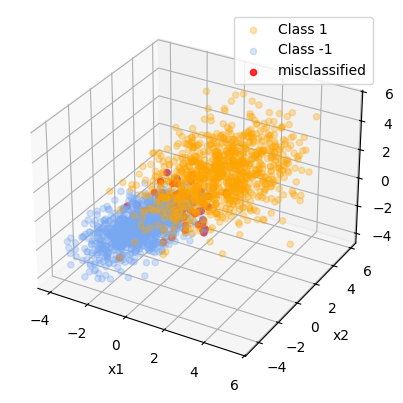

In [80]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter3D(x_train[y_train==1][:,0], x_train[y_train==1][:,1], x_train[y_train==1][:,2], color='orange', alpha=0.3, label='Class 1')
ax.scatter3D(x_train[y_train==-1][:,0], x_train[y_train==-1][:,1], x_train[y_train==-1][:,2], color='#79a8f2', alpha=0.3, label='Class -1')
ax.scatter3D(x_train[y_train!=predict][:,0], x_train[y_train!=predict][:,1], x_train[y_train!=predict][:,2], color='red', alpha=0.8, label='misclassified')

ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.legend()

plt.show()

3. Классификация с помощью линейного дискриминанта Фишера.

In [81]:
np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = np.array([1, -2])
mean2 = np.array([-3, -1])
mean3 = np.array([1, 2])

r = 0.5
D = 1.0
V = [[D, D * r], [D*r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T
x3 = np.random.multivariate_normal(mean3, V, N).T

x_train = np.hstack([x1, x2, x3]).T
y_train = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

# векторы математических ожиданий и ковариационная матрица по выборке x1, x2, x3
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T, (x3.T - mm3).T])
VV = np.array([[np.dot(a[0], a[0]) / (3*N), np.dot(a[0], a[1]) / (3*N)],
               [np.dot(a[1], a[0]) / (3*N), np.dot(a[1], a[1]) / (3*N)]])

# параметры для линейного дискриминанта Фишера
Py1, Py2, Py3 = 0.2, 0.4, 0.4
L1, L2, L3 = 1, 1, 1


alpha1 = np.linalg.inv(VV) @ mm1
alpha2 = np.linalg.inv(VV) @ mm2
alpha3 = np.linalg.inv(VV) @ mm3

beta1 = np.log(L1*Py1) - 0.5 * mm1.T @ np.linalg.inv(VV) @ mm1
beta2 = np.log(L2*Py2) - 0.5 * mm2.T @ np.linalg.inv(VV) @ mm2
beta3 = np.log(L3*Py3) - 0.5 * mm3.T @ np.linalg.inv(VV) @ mm3

model = lambda x, a, b: x.T @ a + b

a1 = np.array([model(x, alpha1, beta1) for x in x_train])
a2 = np.array([model(x, alpha2, beta2) for x in x_train])
a3 = np.array([model(x, alpha3, beta3) for x in x_train])

predict = [np.argmax([x, y, z]) for x, y, z in zip(a1, a2, a3)]

Q = np.sum(predict != y_train)

Линейный дискриминант Фишера:
### $a(x) = argmax(x^T * \alpha + \beta)$, где
### $\alpha = \hat{\Sigma}^{-1} * \hat{\mu}$
### $\beta = ln(\lambda * P(y)) - 0.5 * \hat{\mu}^T * \hat{\Sigma}^{-1} * \hat{\mu}$

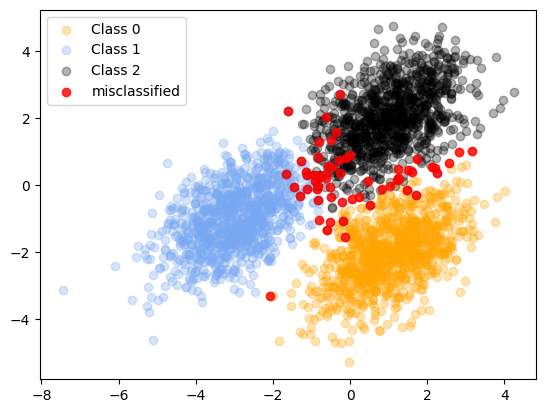

In [82]:
plt.scatter(x_train[y_train==0][:,0], x_train[y_train==0][:,1], color='orange', alpha=0.3, label='Class 0')
plt.scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], color='#79a8f2', alpha=0.3, label='Class 1')
plt.scatter(x_train[y_train==2][:,0], x_train[y_train==2][:,1], color='black', alpha=0.3, label='Class 2')

plt.scatter(x_train[y_train!=predict][:,0], x_train[y_train!=predict][:,1], color='red', alpha=0.8, label='misclassified')

plt.legend()

plt.show()